In [1]:
 
## alpha : learning rate

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from IPython.display import Image
import pandas as pd


In [ ]:
import os
os.chdir("E:\\Machine learning folder")

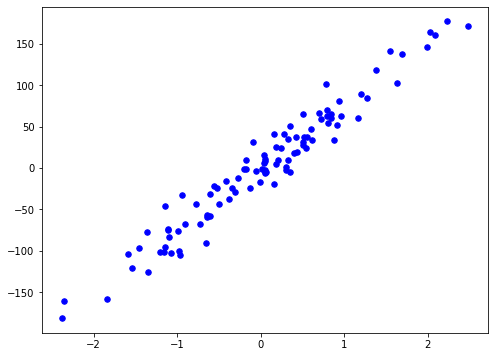

In [2]:
## noise : float, default=0.0
## The standard deviation of the gaussian is "noise" applied to the output.

## we are just taking 100 samples with just one feature
X,y  = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=4)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4,test_size=0.2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X,y,color='b',marker='o',s=30)
plt.show()

In [3]:
print(X_train.shape)
print(y_train.shape)

(80, 1)
(80,)


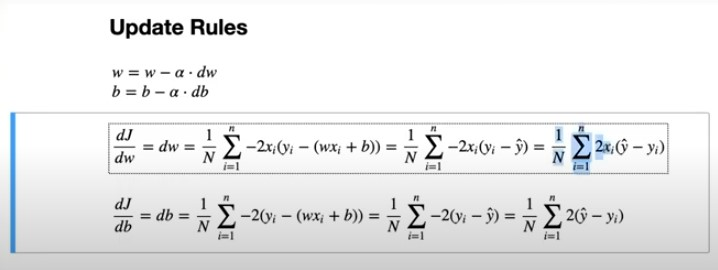

In [7]:
Image(filename = "../LinerRegPhoto.jpg", width = 600, height = 300)

In [6]:
## y = weights * x + bias ~~ y = m*x+c

class LinearRegression:
    def __init__(self, lr=0.001,n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None 
        self.bias = None

    def fit(self,X,y):

        n_sample,n_features = X.shape
        self.weights = np.zeros(n_features) 
        self.bias = 0  

          ## Gradient Descent
        for _ in range(self.n_iter):
            y_predicted = np.dot(X,self.weights) + self.bias

            ## from theory, now compute the gradients
            dw =  (1/n_sample) * np.dot(X.T, (y_predicted - y))
            db  = (1/n_sample) * np.sum(y_predicted - y)

            ## update the parameters
            self.weights -=self.lr * dw
            self.bias -= self.lr * db

  

    def predict(self,X):
        y_approximated = np.dot(X,self.weights) + self.bias
        return y_approximated
                 




In [7]:
def mean_squared_error(y_true,y_pred):
    return np.mean((y_true - y_pred)**2)

regressor = LinearRegression(lr=0.01,n_iter=1000)
regressor.fit(X_train,y_train)
y_prediction = regressor.predict(X_test)

mse = mean_squared_error(y_test,y_prediction)
print("MSE: ", mse)

MSE:  295.15511369424536


In [8]:
## corrcoef returns the normalised covariance matrix
## https://stackoverflow.com/questions/3425439/why-does-corrcoef-return-a-matrix/3425548
## https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred) ## will return the matrix
    corr = corr_matrix[0, 1]  ## [0][1] index value
    return corr ** 2

accu = r2_score(y_test, y_prediction)
print("Accuracy:", accu)

Accuracy: 0.9621321786806648


In [9]:
corr_matrix = np.corrcoef(y_test, y_prediction)
corr_matrix[0][1]

0.9808833665021875

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test, y_prediction)

0.9598290991439422

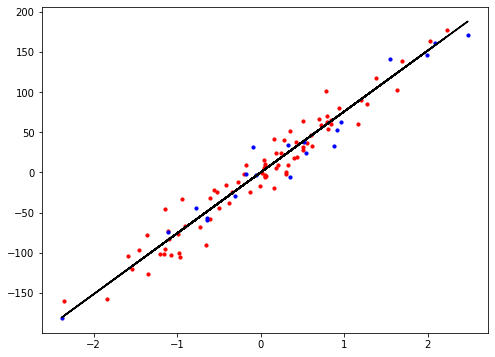

In [11]:
## Lets see how the plot looks

y_pred_line = regressor.predict(X) ## now predicted on full X
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8,6))

m1 = plt.scatter(X_train,y_train,color='red',s=10)
m2 = plt.scatter(X_test,y_test,color='blue',s=10)
plt.plot(X,y_pred_line,color='black',label='prediction')
plt.show()